In [396]:
import pandas as pd
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from collections import Counter

abe_survey = pd.read_excel('ABE Career Outcomes Data 2016-2021.xlsx')

In [277]:
competencies = pd.read_excel('competencies.xlsx')
abe_comp = competencies[competencies['Major']=='Engineering'].drop(['Option(s)', 'Major'], axis=1)

In [382]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [278]:
abe_survey['Organization Name'].value_counts()

John Deere                      18
Vermeer Corporation             12
Cargill, Incorporated            8
Kuhn North America, Inc.         5
Henning Companies LLC            5
                                ..
Toyne Inc.                       1
Puck Custom Enterprises          1
Renewable Energy Group (REG)     1
WSP                              1
Universal Industries, Inc.       1
Name: Organization Name, Length: 100, dtype: int64

In [216]:
bse = abe_survey[abe_survey['Major 1 at Graduation'] == 'Biological Systems Engineering']
ag = abe_survey[abe_survey['Major 1 at Graduation'] == 'Agricultural Engineering']
print('TOP 10 EMPLOYERS FOR BSE AND AE \n \nBSE Common Employers:\n',bse['Organization Name'].value_counts().nlargest(10))
print('AE Common Employers: \n', ag['Organization Name'].value_counts().nlargest(10))
abe = pd.concat([bse['Organization Name'],ag['Organization Name']], axis=0)
abe = abe_survey['Organization Name']
abe = abe.dropna(axis=0)
abe = abe.unique()
abe = pd.DataFrame(abe, columns=['Employer'])
display(abe)

TOP 10 EMPLOYERS FOR BSE AND AE 
 
BSE Common Employers:
 Cargill, Incorporated                                                                                        6
ISG                                                                                                          2
John Deere                                                                                                   2
Ardent Mills                                                                                                 2
PepsiCo                                                                                                      2
ADM                                                                                                          2
Koch Industries Companies (Georgia-Pacific, Molex, Guardian Industries, Flint Hills Resources, & INVISTA)    1
Ajinomoto North America, Inc                                                                                 1
Tate & Lyle                                           

,Employer
0,Double L Group
1,John Deere
2,Kent Corporation
3,Syngenta
4,"Cargill, Incorporated"
...,...
95,United States Department of Agriculture
96,3M
97,"Frito-Lay, Inc."
98,"JEO Consulting Group, Inc."


In [537]:
# Next, I isolated the most common job titles that ABE graduates have. 
# I selected all job titles that at least 2 people acquired upon graduation. 
#bse_job = bse['Job Title'].value_counts().nlargest(4).to_frame()
#ag_job = ag['Job Title'].value_counts().nlargest(17).to_frame()
# using fewer ag jobs for speed
bse_job = bse['Job Title'].value_counts().nlargest(1).to_frame()
ag_job = ag['Job Title'].value_counts().nlargest(1).to_frame()
bse_joblist = bse_job.index.tolist()
ag_joblist = ag_job.index.tolist()
abe_joblist = bse_joblist + ag_joblist
abe_joblist

['Production Engineer', 'Design Engineer']

In [352]:
## ***************************
# huge thank you to Ryan Jeon for developing the base of this indeed text scraping code
# see supplemental information for the source code created by him, it has been modified slightly for this application
from bs4 import BeautifulSoup
import requests

headers = {'User-Agent': "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/70.0.3538.77 Safari/537.36"}
df = pd.DataFrame(columns = ["Job_Titles"])
df2 = pd.DataFrame(columns = ["Company"])
df3 = pd.DataFrame(columns = ["URL"])


r = requests.get('https://www.indeed.com/jobs?q=agricultural%20engineer&start=10'.format(0), headers = headers)
soup = BeautifulSoup(r.text, 'html.parser')
titles = soup.select("h2 span") 
# select all span tags under the umbrella of h2 tags 
companies = soup.find_all(class_ = "companyName")
URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})

for title in titles:
    titles_list = title.text
    # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
    df.loc[len(df.index)] = [titles_list]
    df = df[df.Job_Titles != "new"]

for company in companies:
    company_list = company.text
    df2.loc[len(df2.index)] = [company_list]

for URL in URLs:
    base = 'http://www.indeed.com'
    link = URL.attrs['href']
    new_URL = base + link
    df3.loc[len(df3.index)] = [new_URL]    
    
indeed = pd.concat([df, df2, df3], axis=1, join='inner')
display(df)
display(indeed)
## *************** end of code edited from Ryan Jeon's amazing work! :)

,Job_Titles
0,Engineer I/II
1,Engineer II
2,Automation Engineer III/IV
3,Quality Engineer
4,Manufacturing Engineer
5,Research Civil Engineer-Research Agricultural ...
6,"Product Engineer, Steam Conditioning Team"
7,Senior Service Technician / Mechanic
8,Entry Level Engineer
9,Supervisor--Entry Level Engineer


,Job_Titles,Company,URL
0,Engineer I/II,Iowa State University,http://www.indeed.com/rc/clk?jk=d2c33824e9a36f...
1,Engineer II,"Moeller Engineering, LLC",http://www.indeed.com/company/Moeller-Engineer...
2,Automation Engineer III/IV,Iowa State University,http://www.indeed.com/rc/clk?jk=8fd0bf6709c3b9...
3,Quality Engineer,RFA Engineering,http://www.indeed.com/rc/clk?jk=bdddfa42230d10...
4,Manufacturing Engineer,Danfoss,http://www.indeed.com/rc/clk?jk=e505c4ec9bdb73...
5,Research Civil Engineer-Research Agricultural ...,US Agricultural Research Service,http://www.indeed.com/rc/clk?jk=13da174444b3b0...
6,"Product Engineer, Steam Conditioning Team",Emerson,http://www.indeed.com/rc/clk?jk=a3b5efd1e94cc7...
7,Senior Service Technician / Mechanic,ALMACO,http://www.indeed.com/rc/clk?jk=46bb3feff1bcb3...
8,Entry Level Engineer,Tent Engineering,http://www.indeed.com/company/Tent-Engineering...
9,Supervisor--Entry Level Engineer,Republic Steel,http://www.indeed.com/rc/clk?jk=5309b58db4c539...


In [416]:
def indeed_posts(search_term):

    kw = search_term.split(" ")
    ## *************************** a huge thank you to Ryan Jeon for developing the base of this indeed text scraping code
    # see supplemental information for the source code created by him, it has been modified slightly for this application
    from bs4 import BeautifulSoup
    import requests
    import time
    headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/605.1.15 (KHTML, like Gecko) Version/14.1.2 Safari/605.1.15'}
    df = pd.DataFrame(columns = ["Job_Titles"])
    df2 = pd.DataFrame(columns = ["Company"])
    df3 = pd.DataFrame(columns = ["URL"])
    sind = f'https://www.indeed.com/jobs?as_and='
    kword = '&as_phr&as_any=biological%2C%20agriculture%2C%20food%2C%20environment%2C%20biofuel%2C%20fermentation%2C%20water%2C%20machinery%2C%20animal'
    end = '&as_not&as_ttl&as_cmp&jt=all&st&salary&radius=25&l&fromage=any&limit=10&sort&psf=advsrch&from=advancedsearch&vjk=ffced369343eb245'
    # key words to look for in job title/description to get closer to the industry students join
                        #change to 30, updated for speed
    for pagenum in range(0,10,10):
        for word in range(0,len(kw)-1):
            search_url = sind + kw[word] + '%20'
        search_url = search_url + kw[len(kw)-1] + kword + end+'%20&start=' + str(pagenum)
        r = requests.get(search_url, headers = headers)
        time.sleep(1)
        soup = BeautifulSoup(r.text, 'html.parser')
        titles = soup.select("h2 span") 
        # select all span tags under the umbrella of h2 tags 
        companies = soup.find_all(class_ = "companyName")
        URLs = soup.find_all('a', attrs = {'class' : 'tapItem'})
        for title in titles:
            titles_list = title.text
            # the gotcha here is that there are "news" scattered so we have to remove those first before concatenating our data
            df.loc[len(df.index)] = [titles_list]
            df = df[df.Job_Titles != "new"]
        for company in companies:
            company_list = company.text
            df2.loc[len(df2.index)] = [company_list]
        for URL in URLs:
            base = 'http://www.indeed.com'
            link = URL.attrs['href']
            new_URL = base + link
            df3.loc[len(df3.index)] = [new_URL]    
        ## *************************** end of code edited from Ryan Jeon's amazing work! :)

    jdesc =  pd.DataFrame(columns = ["Job Description"])

    for post in df3['URL']:
        r = requests.get(post.format(0), headers = headers)
        soup = BeautifulSoup(r.text, 'html.parser')
        time.sleep(1)
        job_description = soup.find('div',{'id':'jobDescriptionText'})
        jd = job_description.get_text(separator=" ") if job_description else "N/A"
        jdesc.loc[len(jdesc.index)] = [jd.strip()]   
    indeed = pd.concat([df, df2, df3, jdesc], axis=1, join='inner')
    return indeed

In [493]:
# function to clean up text (remove common value-minimal words, punctuation, capitalization)
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
engr_stopwords = ['engineering', 'work', 'experience', 'job', 'ability', 'insurance', 'pay', 'location', 'requirements',
                 'required', 'skill', 'skills', 'years', 'release', 'engineer']
def clean_post(text):
 #   stopwords = stopwords.words('english')
    text = ''.join([word for word in text if word not in string.punctuation])
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stopwords])
    text = ' '.join([word for word in text.split() if word not in engr_stopwords])
    return text

In [554]:
# add ability to send in key words also
#job_specification_terms = "list of interestes related to major, ex: water, food, machinery"
# when calling, joblist = abe_joblist
def major_comp(joblist):
    from sklearn.feature_extraction.text import TfidfVectorizer
    import itertools
    tfidf_v = TfidfVectorizer()
    tskill = []
    dfs = {}
    for job in joblist:
        search_results = indeed_posts(job)
        posts = search_results['Job Description'].tolist()
        clean_posts = list(map(clean_post, posts))
        eval_job = tfidf_v.fit_transform(clean_posts)
        fname = tfidf_v.get_feature_names()
        
        # creating list of lists top skills
        #df = pd.DataFrame(eval_job.T.toarray(), index=fname)
        #job_avg = df.mean(axis=1)
        #job_avg = pd.DataFrame(job_avg.sort_values(ascending=False).nlargest(10))
        #job_avg.index.name = 'Skill'
        #job_avg.reset_index(inplace=True)
        #tskill.append(job_avg['Skill'].tolist())
        
        # creating dictionary of top skills
        df = pd.DataFrame(eval_job.T.toarray(), index=fname)
        job_avg = df.mean(axis=1)
        job_avg = pd.DataFrame(job_avg.sort_values(ascending=False).nlargest(10))
        job_avg.index.name = 'Skill'
        job_avg.reset_index(inplace=True)
        dfs[job] = job_avg
        
        
        
        
        
        
        #random but keep still
        #pd.DataFrame(eval_job.T.toarray(), index=fname)
        #df = pd.DataFrame(eval_job.T.todense(), index = tfdif_v.get_feature_names_out(), columns = [str(job)])
        #df = df.sort_values(by=[str(job)], ascending=False)
        #display(df)
        #dfs.append(df)

    #tskill_df = pd.DataFrame(tskill, columns=joblist)
       
#return tskill --> when creating list of lists
    return dfs


In [555]:
tskill = major_comp(abe_joblist)

In [557]:
tskill['Production Engineer']

,Skill,0
0,manufacturing,0.070755
1,production,0.056783
2,lockheed,0.048846
3,martin,0.048846
4,process,0.048812
5,equipment,0.047472
6,environment,0.047275
7,project,0.044088
8,team,0.042993
9,plant,0.042529


In [520]:
skills = []
for element in tskill:
    for item in element:
        skills.append(item)

        
import itertools
skills = list(itertools.chain(*tskill))

list

In [336]:
y = indeed_posts('Project Engineer')
display(y)

,Job_Titles,Company,URL,Job Description
0,Mechanical Designer / Engineer-Work Remotely!,SSI Consulting,http://www.indeed.com/company/SSI-Consulting/j...,We are seeking mechanical designers and / or e...
1,MECHICAL ENGINEER (NO EXPERIENCE),CEMEX USA,http://www.indeed.com/company/CEMEX-USA/jobs/M...,"Company Overview Founded in 1906, over the las..."
2,MECHANICAL ENGINEER (NO EXPERIENCE),CEMEX USA,http://www.indeed.com/company/CEMEX-USA/jobs/M...,"Company Overview Founded in 1906, over the las..."
3,Project Engineer,Hy-Vee Construction,http://www.indeed.com/company/Hy--Vee-Construc...,Are you looking for a stable employer? Do you ...
4,Order Fulfillment Process Quality Engineer,John Deere,http://www.indeed.com/rc/clk?jk=7e8cb6a7f8fed2...,"At John Deere, we run so life can leap forward..."
5,Equipment Engineer - APPLY NOW!,Texas Instruments,http://www.indeed.com/pagead/clk?mo=r&ad=-6NYl...,Texas Instruments Incorporated (TI) is a globa...
6,Project Engineer - Food Manufacturing- Dairy P...,Lactalis American Group,http://www.indeed.com/company/Lactalis-America...,Summary: This position reports to the Project ...
7,EHS Engineer*,3M,http://www.indeed.com/rc/clk?jk=da8e35ddd6b904...,Job Description:\n EHS Engineer\n Collaborate ...
8,Facility Project Engineer,Facebook App,http://www.indeed.com/rc/clk?jk=e204146f523720...,Facebook is seeking a Facilities Project Engin...
9,Associate Electrical Engineer,City of Sacramento,http://www.indeed.com/rc/clk?jk=77e6864d6cf076...,THE POSITION \n THIS POSTING IS FOR ASSOCIATE ...


In [283]:
Counter(" ".join(y['Job Description']).split()).most_common(5)
# most of the words in the descriptions are common words that add little meaning. Let's clean this up

[('and', 3021), ('to', 1648), ('the', 1437), ('of', 1301), ('in', 894)]

In [399]:
posts = y['Job Description'].tolist()
display(posts[0])
clean_posts = list(map(clean_post, posts))
clean_posts[0]

'We are seeking mechanical designers and / or engineers to join our growing team in an exciting and new culture of consulting. Our vision for SSI is to provide professionals a means to be a part of something bigger, grow themselves, make a positive, tangible impact in our clients\' operations, and offer a flexible work environment. We all work from home, collaborate via Teams, phone, email, and meet if / when needed for specific projects as well as to keep the social aspect of work alive. Mechanical designers / engineers will work on the layout and design of mechanical systems for industrial clients in the bulk material handling world. We routinely work in cement, grain, aggregates, but also in varied industries from roofing granules to kitty litter components. The ideal candidate will have expertise in the development of material handling systems, including design and layout of material feed and reclaim systems. Good communication and time management is essential. The candidate will w

'seeking mechanical designers engineers join growing team exciting new culture consulting vision ssi provide professionals means part something bigger grow make positive tangible impact clients operations offer flexible work environment work home collaborate via teams phone email meet needed specific projects well keep social aspect work alive mechanical designers engineers work layout design mechanical systems industrial clients bulk material handling world routinely work cement grain aggregates also varied industries roofing granules kitty litter components ideal candidate expertise development material handling systems including design layout material feed reclaim systems good communication time management essential candidate work designers engineers complete drawing sets concept issued construction drawings including flow schematics general arrangements equipment lists piping schematics mechanical plans elevations details sections team mix people working together provide common sen

In [284]:
abe_competencies = [' '.join(abe_comp['Outcome'])]
clean_abe_comp = [clean_post(abe_competencies)]
info = clean_abe_comp + clean_posts

In [285]:
vectorizer = CountVectorizer().fit_transform(info)
vectors = vectorizer.toarray()
csim = cosine_similarity(vectors)
csim[0]

array([1.        , 0.18422073, 0.06474772, 0.10024666, 0.06458504,
       0.06258457, 0.08410313, 0.11267485, 0.18654777, 0.24262361,
       0.21078208, 0.17607506, 0.06528679, 0.08105299, 0.28165238,
       0.1980042 , 0.19798632, 0.07091021, 0.07645403, 0.15426311,
       0.13724253, 0.20935814, 0.13396236, 0.16010009, 0.16533392,
       0.25615471, 0.14844687, 0.27964032, 0.13740172, 0.2495729 ,
       0.17743856, 0.14112142, 0.1759198 , 0.24039967, 0.17816909,
       0.15427651, 0.08723571, 0.15248204, 0.15280734, 0.158354  ,
       0.06734445, 0.12773812, 0.26037682, 0.22625708, 0.16881838,
       0.23738385, 0.10874225, 0.22344128, 0.21148863, 0.25416298,
       0.17377871, 0.11841497, 0.15725813, 0.15424714, 0.16836677,
       0.07645403, 0.13324477, 0.1183164 , 0.1647447 , 0.18127747,
       0.21786322, 0.11960929, 0.08179631, 0.2550891 , 0.19354275,
       0.19717872, 0.08105299, 0.34305614, 0.19828507, 0.15711838,
       0.14392357, 0.21744699, 0.18059795, 0.10884482, 0.17939

In [237]:
test = CountVectorizer()
# provide vocabulary to vectorizer based on competencies
vec = test.fit(clean_abe_comp)
print(vec.vocabulary_.keys())

dict_keys(['ability', 'identify', 'formulate', 'solve', 'complex', 'engineering', 'problems', 'applying', 'principles', 'science', 'mathematics', 'communicate', 'effectively', 'range', 'audiences', 'apply', 'design', 'produce', 'solutions', 'meet', 'specified', 'needs', 'consideration', 'public', 'health', 'safety', 'welfare', 'well', 'global', 'cultural', 'social', 'environmental', 'economic', 'factors', 'recognize', 'ethical', 'professional', 'responsibilities', 'situations', 'make', 'informed', 'judgments', 'must', 'consider', 'impact', 'societal', 'contexts', 'function', 'team', 'whose', 'members', 'together', 'provide', 'leadership', 'create', 'collaborative', 'inclusive', 'environment', 'establish', 'goals', 'plan', 'tasks', 'objectives', 'develop', 'conduct', 'appropriate', 'experimentation', 'analyze', 'interpret', 'data', 'use', 'judgment', 'draw', 'conclusions', 'acquire', 'new', 'knowledge', 'needed', 'using', 'learning', 'strategies'])


In [305]:
# identify counts of vocabulary from competencies
display(clean_posts)
job_fit = test.transform(clean_posts)

['want build stronger sustainable future cultivate career join cargills global team 160000 employees committed safe responsible sustainable ways nourish world position cargill’s food ingredients bioindustrial business anticipate trends around taste nutrition safety innovate provide solutions manufacturers retailers foodservice companies job purpose impact project engineer ii focus optimizing interconnected components manufacturing system seek professional develop apply engineering standards procedures providing advice issues within engineering field role help coordinate plant location personnel work flow ergonomics materials logistics production process sequence equipment layouts key accountabilities help manufacturing plant facilities engineers facility planning design help conduct costinventoryproduction control human factors studies develop implement plans facility modifications revise operating methods establish methods maximize use production facilities personnel independently sol

In [239]:
sim = job_fit.toarray()

In [286]:
sim.shape

(90, 81)

In [243]:
jsim = cosine_similarity(sim)
# this is just similarity between posts, not to comp

In [244]:
jsim

array([[1.        , 0.30194054, 0.34426519, ..., 0.26069143, 0.45020003,
        0.44248489],
       [0.30194054, 1.        , 0.0877058 , ..., 0.15626908, 0.20853456,
        0.21862494],
       [0.34426519, 0.0877058 , 1.        , ..., 0.10096536, 0.63404262,
        0.2388845 ],
       ...,
       [0.26069143, 0.15626908, 0.10096536, ..., 1.        , 0.31914029,
        0.58570451],
       [0.45020003, 0.20853456, 0.63404262, ..., 0.31914029, 1.        ,
        0.63713221],
       [0.44248489, 0.21862494, 0.2388845 , ..., 0.58570451, 0.63713221,
        1.        ]])

<AxesSubplot:>

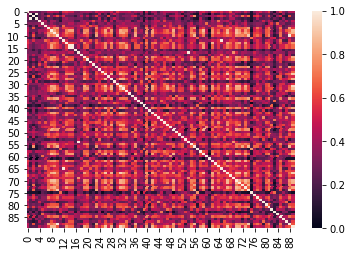

In [245]:
import seaborn as sns

sns.heatmap(jsim)

In [403]:
tfidf_v = TfidfVectorizer()
vocab = tfidf_v.fit_transform(clean_abe_comp)

In [449]:
len(clean_posts)

45

In [553]:
tfidf_v = TfidfVectorizer()
vocab = tfidf_v.fit(clean_abe_comp)
job_assess = tfidf_v.transform(clean_posts)
#job_fit = tfidf_v.inverse_transform(job_assess)
prepared = job_assess
fname = tfidf_v.get_feature_names()
df = pd.DataFrame(prepared.T.toarray(), index=fname)
job_avg = df.mean(axis=1)
job_avg = pd.DataFrame(job_avg.sort_values(ascending=False).nlargest(10))
job_avg.index.name = 'Skill'
job_avg.reset_index(inplace=True)
#job_avg = job_avg.drop(['0'],axis=0)
#tskill_dfs.append(job_avg)
job_avg

,Skill,0
0,engineering,0.388766
1,team,0.207118
2,design,0.206165
3,ability,0.157136
4,must,0.156625
5,environment,0.143621
6,responsibilities,0.140412
7,safety,0.133012
8,knowledge,0.106979
9,data,0.102673


In [459]:
tfidf_v = TfidfVectorizer()
vocab = tfidf_v.fit(clean_abe_comp)
job_assess = tfidf_v.transform(clean_posts)
#job_fit = tfidf_v.inverse_transform(job_assess)
prepared = job_assess
fname = tfidf_v.get_feature_names()
df = pd.DataFrame(prepared.T.toarray(), index = fname)
for col in df:
    top = pd.DataFrame(df[col].sort_values(ascending=False).nlargest(10))
    top.index.name = 'Skill'
    top.reset_index(inplace=True)
    display(top)
#df.sort_values(by=['tfidf'], ascending= False).head()
#df.sum(axis=1)
#df

,Skill,0
0,design,0.721688
1,provide,0.288675
2,together,0.288675
3,team,0.288675
4,solutions,0.144338
5,impact,0.144338
6,new,0.144338
7,goals,0.144338
8,social,0.144338
9,needed,0.144338


,Skill,1
0,ability,0.574696
1,engineering,0.478913
2,safety,0.287348
3,well,0.191565
4,leadership,0.191565
5,knowledge,0.191565
6,acquire,0.191565
7,must,0.191565
8,global,0.191565
9,responsibilities,0.191565


,Skill,2
0,ability,0.574696
1,engineering,0.478913
2,safety,0.287348
3,well,0.191565
4,leadership,0.191565
5,knowledge,0.191565
6,acquire,0.191565
7,must,0.191565
8,global,0.191565
9,responsibilities,0.191565


,Skill,3
0,safety,0.508001
1,appropriate,0.381000
2,plan,0.381000
3,team,0.254000
4,environment,0.254000
5,health,0.254000
6,knowledge,0.254000
7,ability,0.127000
8,impact,0.127000
9,goals,0.127000


,Skill,4
0,engineering,0.565685
1,design,0.424264
2,data,0.282843
3,new,0.282843
4,responsibilities,0.282843
5,applying,0.141421
6,knowledge,0.141421
7,safety,0.141421
8,function,0.141421
9,team,0.141421


,Skill,5
0,safety,0.520266
1,health,0.433555
2,engineering,0.433555
3,ability,0.346844
4,environment,0.346844
5,effectively,0.173422
6,appropriate,0.086711
7,problems,0.086711
8,team,0.086711
9,knowledge,0.086711


,Skill,6
0,responsibilities,0.557086
1,health,0.371391
2,professional,0.371391
3,function,0.185695
4,environment,0.185695
5,apply,0.185695
6,engineering,0.185695
7,appropriate,0.185695
8,must,0.185695
9,team,0.185695


,Skill,7
0,environmental,0.5625
1,health,0.4375
2,safety,0.4375
3,impact,0.1875
4,use,0.1875
5,ability,0.1250
6,data,0.1250
7,leadership,0.1250
8,must,0.1250
9,global,0.1250


,Skill,8
0,data,0.589256
1,together,0.471405
2,safety,0.235702
3,team,0.235702
4,environment,0.235702
5,develop,0.235702
6,problems,0.235702
7,identify,0.117851
8,consider,0.117851
9,health,0.117851


,Skill,9
0,engineering,0.651217
1,professional,0.397966
2,must,0.325609
3,public,0.289430
4,knowledge,0.253251
5,design,0.217072
6,responsibilities,0.144715
7,complex,0.144715
8,provide,0.108536
9,meet,0.108536


,Skill,10
0,design,0.646762
1,engineering,0.404226
2,knowledge,0.323381
3,team,0.242536
4,solutions,0.242536
5,create,0.242536
6,problems,0.161690
7,together,0.080845
8,range,0.080845
9,establish,0.080845


,Skill,11
0,new,0.744208
1,engineering,0.372104
2,team,0.248069
3,develop,0.248069
4,science,0.248069
5,responsibilities,0.124035
6,consider,0.124035
7,needed,0.124035
8,public,0.124035
9,environment,0.124035


,Skill,12
0,engineering,0.722315
1,design,0.481543
2,applying,0.240772
3,team,0.240772
4,ability,0.120386
5,solutions,0.120386
6,must,0.120386
7,new,0.120386
8,principles,0.120386
9,environment,0.120386


,Skill,13
0,design,0.779769
1,engineering,0.496217
2,develop,0.141776
3,needs,0.141776
4,data,0.141776
5,meet,0.141776
6,knowledge,0.141776
7,appropriate,0.070888
8,responsibilities,0.070888
9,safety,0.070888


,Skill,14
0,must,0.458831
1,data,0.458831
2,goals,0.229416
3,conduct,0.229416
4,engineering,0.229416
5,make,0.229416
6,responsibilities,0.229416
7,design,0.229416
8,environmental,0.229416
9,team,0.229416


,Skill,15
0,team,0.555556
1,use,0.444444
2,complex,0.333333
3,health,0.222222
4,engineering,0.222222
5,solutions,0.222222
6,communicate,0.222222
7,make,0.111111
8,environment,0.111111
9,professional,0.111111


,Skill,16
0,data,0.589256
1,together,0.471405
2,safety,0.235702
3,team,0.235702
4,environment,0.235702
5,develop,0.235702
6,problems,0.235702
7,identify,0.117851
8,consider,0.117851
9,health,0.117851


,Skill,17
0,must,0.818393
1,engineering,0.272798
2,ability,0.204598
3,safety,0.204598
4,use,0.136399
5,team,0.136399
6,appropriate,0.136399
7,solutions,0.136399
8,environment,0.136399
9,problems,0.136399


,Skill,18
0,develop,0.447214
1,new,0.372678
2,data,0.298142
3,well,0.298142
4,needs,0.298142
5,design,0.298142
6,environment,0.223607
7,use,0.223607
8,science,0.223607
9,responsibilities,0.149071


,Skill,19
0,engineering,0.765092
1,safety,0.318788
2,create,0.255031
3,design,0.191273
4,learning,0.191273
5,solutions,0.191273
6,health,0.127515
7,environmental,0.127515
8,environment,0.127515
9,appropriate,0.127515


,Skill,20
0,team,0.686803
1,design,0.412082
2,apply,0.274721
3,make,0.274721
4,ability,0.137361
5,inclusive,0.137361
6,environment,0.137361
7,engineering,0.137361
8,problems,0.137361
9,develop,0.137361


,Skill,21
0,safety,0.520266
1,health,0.433555
2,engineering,0.433555
3,ability,0.346844
4,environment,0.346844
5,effectively,0.173422
6,appropriate,0.086711
7,problems,0.086711
8,team,0.086711
9,knowledge,0.086711


,Skill,22
0,engineering,0.639602
1,responsibilities,0.213201
2,impact,0.213201
3,environment,0.213201
4,professional,0.213201
5,problems,0.213201
6,global,0.213201
7,data,0.213201
8,create,0.213201
9,identify,0.213201


,Skill,23
0,engineering,0.470360
1,team,0.376288
2,solutions,0.376288
3,ability,0.376288
4,provide,0.282216
5,knowledge,0.188144
6,situations,0.188144
7,data,0.188144
8,learning,0.188144
9,communicate,0.094072


,Skill,24
0,ability,0.574696
1,engineering,0.478913
2,safety,0.287348
3,well,0.191565
4,leadership,0.191565
5,knowledge,0.191565
6,acquire,0.191565
7,must,0.191565
8,global,0.191565
9,responsibilities,0.191565


,Skill,25
0,must,0.577350
1,team,0.433013
2,environment,0.433013
3,professional,0.288675
4,range,0.144338
5,consider,0.144338
6,health,0.144338
7,new,0.144338
8,plan,0.144338
9,engineering,0.144338


,Skill,26
0,engineering,0.559503
1,new,0.466252
2,knowledge,0.279751
3,environment,0.186501
4,effectively,0.186501
5,environmental,0.186501
6,plan,0.186501
7,team,0.186501
8,science,0.186501
9,safety,0.186501


,Skill,27
0,must,0.648544
1,provide,0.389127
2,engineering,0.324272
3,problems,0.226991
4,new,0.226991
5,consideration,0.194563
6,knowledge,0.162136
7,make,0.162136
8,applying,0.129709
9,meet,0.129709


,Skill,28
0,team,0.474342
1,engineering,0.474342
2,ability,0.316228
3,responsibilities,0.316228
4,environment,0.316228
5,must,0.158114
6,design,0.158114
7,impact,0.158114
8,identify,0.158114
9,needs,0.158114


,Skill,29
0,must,0.731272
1,engineering,0.365636
2,knowledge,0.219382
3,responsibilities,0.219382
4,safety,0.219382
5,use,0.146254
6,solutions,0.146254
7,design,0.146254
8,ability,0.146254
9,appropriate,0.146254


,Skill,30
0,must,0.731272
1,engineering,0.365636
2,knowledge,0.219382
3,responsibilities,0.219382
4,safety,0.219382
5,use,0.146254
6,solutions,0.146254
7,design,0.146254
8,ability,0.146254
9,appropriate,0.146254


,Skill,31
0,engineering,0.530330
1,environmental,0.353553
2,team,0.353553
3,develop,0.353553
4,solutions,0.353553
5,well,0.176777
6,leadership,0.176777
7,must,0.176777
8,responsibilities,0.176777
9,identify,0.176777


,Skill,32
0,knowledge,0.345033
1,engineering,0.345033
2,design,0.345033
3,new,0.276026
4,environment,0.276026
5,solutions,0.276026
6,global,0.207020
7,data,0.207020
8,team,0.207020
9,provide,0.207020


,Skill,33
0,must,0.698963
1,apply,0.436852
2,ability,0.262111
3,applying,0.174741
4,use,0.174741
5,public,0.174741
6,provide,0.174741
7,meet,0.174741
8,knowledge,0.174741
9,engineering,0.174741


,Skill,34
0,engineering,0.496139
1,team,0.496139
2,design,0.372104
3,plan,0.248069
4,environment,0.248069
5,make,0.248069
6,ability,0.124035
7,data,0.124035
8,produce,0.124035
9,responsibilities,0.124035


,Skill,35
0,design,0.561951
1,environment,0.374634
2,team,0.374634
3,leadership,0.280976
4,solutions,0.280976
5,professional,0.280976
6,engineering,0.280976
7,new,0.093659
8,goals,0.093659
9,provide,0.093659


,Skill,36
0,engineering,0.755263
1,design,0.503509
2,apply,0.167836
3,safety,0.167836
4,team,0.167836
5,ability,0.083918
6,solve,0.083918
7,provide,0.083918
8,environment,0.083918
9,global,0.083918


,Skill,37
0,responsibilities,0.557086
1,health,0.371391
2,professional,0.371391
3,function,0.185695
4,environment,0.185695
5,apply,0.185695
6,engineering,0.185695
7,appropriate,0.185695
8,must,0.185695
9,team,0.185695


,Skill,38
0,ability,0.573539
1,engineering,0.458831
2,environmental,0.344124
3,design,0.344124
4,knowledge,0.229416
5,team,0.229416
6,inclusive,0.114708
7,environment,0.114708
8,responsibilities,0.114708
9,solutions,0.114708


,Skill,39
0,engineering,0.781736
1,design,0.426401
2,team,0.284268
3,ability,0.213201
4,environment,0.142134
5,develop,0.142134
6,science,0.071067
7,meet,0.071067
8,using,0.071067
9,use,0.071067


,Skill,40
0,engineering,0.779769
1,team,0.425329
2,well,0.141776
3,leadership,0.141776
4,new,0.141776
5,design,0.141776
6,provide,0.141776
7,safety,0.141776
8,develop,0.141776
9,needed,0.070888


,Skill,41
0,factors,0.665512
1,engineering,0.374351
2,design,0.374351
3,data,0.207973
4,knowledge,0.166378
5,provide,0.166378
6,needs,0.124784
7,range,0.124784
8,team,0.124784
9,together,0.124784


,Skill,42
0,ability,0.507093
1,plan,0.338062
2,engineering,0.338062
3,health,0.338062
4,team,0.338062
5,provide,0.169031
6,environment,0.169031
7,responsibilities,0.169031
8,design,0.169031
9,global,0.169031


,Skill,43
0,data,0.559017
1,appropriate,0.447214
2,engineering,0.335410
3,well,0.223607
4,health,0.223607
5,professional,0.223607
6,tasks,0.223607
7,leadership,0.111803
8,plan,0.111803
9,global,0.111803


,Skill,44
0,responsibilities,0.529999
1,engineering,0.423999
2,safety,0.317999
3,ability,0.317999
4,must,0.212000
5,new,0.212000
6,health,0.212000
7,design,0.212000
8,using,0.106000
9,data,0.106000


In [303]:
job_assess = job_assess.toarray()

In [ ]:
# identify common skills from each job, each job make common requirements & skills (1 list per job search term)

#use tfidf vector for cosine similarity, heatmap w/ competencies